In [1]:
# Connect to Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unrar x "/content/drive/MyDrive/Crypro_21.rar" "content/"


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/drive/MyDrive/Crypro_21.rar

Creating    content                                                   OK
Extracting  content/data_TSTUSDT.pkl                                       4%  OK 
Extracting  content/data_TRXUSDT.pkl                                       9%  OK 
Extracting  content/data_OGUSDT.pkl                                       13%  OK 
Extracting  content/data_XRPUSDT.pkl                                      19%  OK 
Extracting  content/data_FORMUSDT.pkl                                     23%  OK 
Extracting  content/data_USDCUSDT.pkl                                     27%  OK 
Extracting  content/data_BTCUSDT.pkl                                      34% 35%  OK 
Extracting  content/data_WUSDT.pkl                                        39%  OK 
Extracting  content/data_TUSDT.pkl                   

In [3]:
import pandas as pd
symbol = 'BTCUSDT'
df_news = pd.read_pickle('/content/drive/MyDrive/news_20crypto.pickle')
df_news['time'] = pd.to_datetime(df_news['releasedAt']).dt.floor('min').astype(str)
df_news = df_news[df_news['asset_symbols'].apply(lambda x: (symbol[:-4] in str(x)) or ('ETH' in str(x)))]
df_news[['releasedAt', 'time']]
df_news

,ID,releasedAt,title,subtitle,sourceName,sourceUrl,source,slug,asset_names,asset_slugs,asset_symbols,content,time
1,67bf0e677abefca47e66327e,2025-02-25 00:00:00,2025’s Crypto Battle: Altcoin vs. XRP and Bitc...,Digital currencies now play a key role in glob...,Crypto Front News,https://coinmarketcap.com/community/en/article...,coinmarketcap,blockdag-vs-bitcoin-xrp-which-crypto-holds-lon...,"Ethereum, Bitcoin, BlockDAG, XRP, One","ethereum, bitcoin, blockdag, xrp, gmix","ETH, BTC, BDAG, XRP, GMIX",Digital currencies now play a key role in glob...,2025-02-25 00:00:00
5,67bf0e677abefca47e663282,2025-02-25 00:00:00,Bitcoin Dives Below $90K Amid ETF Sell-Offs an...,"Bitcoin has dropped below $90,000 for the firs...",WalletInvestor,https://coinmarketcap.com/community/en/article...,coinmarketcap,bitcoin-dives-below-90k-amid-etf-sell-offs-and...,"Solana, ETF, Bitcoin, ETF, Shiba Inu","solana, etf, bitcoin, etfsol2024, shiba-inu","SOL, ETF, BTC, ETF, SHIB","Bitcoin has dropped below $90,000 for the firs...",2025-02-25 00:00:00
7,67bf0e677abefca47e663284,2025-02-25 00:00:00,4 Ways to Increase the Value of Crypto Assets,Cryptocurrency investments can be highly rewar...,WalletInvestor,https://coinmarketcap.com/community/en/article...,coinmarketcap,4-ways-to-increase-the-value-of-crypto-assets,"Bounty, Cryptocurrency, Million, Liquid, Rewards","bounty, cryptocurrency, million, liquid-networ...","BNTY, CCY, MM, LBTC, RWD",Cryptocurrency investments can be highly rewar...,2025-02-25 00:00:00
10,67bf0e677abefca47e66327c,2025-02-25 00:00:10,"Major Crypto News: XRP, SOLANA, and MAGACOINOF...",The Crypto Market’s Next Big Movers—Who’s Lead...,Bitcoin Sistemi,https://coinmarketcap.com/community/en/article...,coinmarketcap,major-crypto-news-xrp-solana-and-magacoinoffic...,"Ethereum, Win, Major, Solana, XRP","ethereum, connect-united, major, solana, xrp","ETH, WIN, MAJOR, SOL, XRP",The Crypto Market’s Next Big Movers—Who’s Lead...,2025-02-25 00:00:00
14,67bf0e677abefca47e663278,2025-02-25 00:01:00,"XRP on Verge of Losing Crucial Support, Ethere...",Numerous assets are reaching levels that might...,U.Today,https://coinmarketcap.com/community/en/article...,coinmarketcap,xrp-on-verge-of-losing-crucial-support-ethereu...,"Ethereum, Dogecoin, bullish, Dogecoin, XRP","ethereum, doge-on-base, bullish, dogecoin, xrp","ETH, DOGE, BULLISH, DOGE, XRP",Cover image viaU.TodayWith its price hovering ...,2025-02-25 00:01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68193,6833ac73040d6fffd0a49f14,2025-05-25 23:40:38,Metaplanet Tops SBI Securities NISA Stock Purc...,Metaplanet leads as top stock purchase in Japa...,CoinLineup,https://coinmarketcap.com/community/en/article...,coinmarketcap,metaplanet-sbi-securities-nisa-stock,"Bitcoin, Top, Read, CEO","bitcoin, top-protocol, read, ceo","BTC, TOP, READ, CEO","Key Points:Metaplanet leads NISA purchases, si...",2025-05-25 23:40:00
68201,6833addc51e12bb49bc9cc37,2025-05-25 23:47:19,Bitcoin Halving Post-2024 Sparks Consolidation...,The 2024 Bitcoin halving event triggers signif...,TokenTopNews,https://coinmarketcap.com/community/en/article...,coinmarketcap,bitcoin-halving-2024-market-analysis,"2024, 2024, Bitcoin, Read","2024-token, 2024-bsc, bitcoin, read","2024, 2024, BTC, READ",Key Takeaways:Bitcoin post-halving consolidati...,2025-05-25 23:47:00
68205,6833af44d4ba08aec29a16cf,2025-05-25 23:52:53,Spot Bitcoin ETFs Achieve $25 Billion Weekly V...,U.S. spot Bitcoin ETFs reach $25 billion in we...,Bitcoin Info News,https://coinmarketcap.com/community/en/article...,coinmarketcap,bitcoin-etfs-25-billion-volume,"Bitcoin ETF, Bitcoin, Read, Spot, BlackRock","bitcoin-etf-token, bitcoin, read, spot, blackrock","ETF, BTC, READ, SPOT, BLACKROCK",What to Know:Record trading volume in U.S. Bit...,2025-05-25 23:52:00
68209,6833af44d4ba08aec29a16cd,2025-05-25 23:55:31,"Trump Postpones EU Tariffs, Bitcoin Breaks $10...",Trump delays EU tariffs to July; Bitcoin rises...,Coincu,https://coinmarketcap.com/community/en/artic

In [4]:
data_btc_total = pd.read_pickle('/content/content/data_{}.pkl'.format(symbol))
data_btc_total['time'] = data_btc_total['dateTime'].astype(str)

Add Indicator

In [5]:
merged_data = data_btc_total.copy()

merged_data['Volatility'] = merged_data['close'].pct_change(fill_method=None).rolling(5).std().fillna(0)

# Calculate Moving Averages
merged_data['SMA_5'] = merged_data['close'].rolling(window=5).mean()
merged_data['EMA_5'] = merged_data['close'].ewm(span=5, adjust=False).mean()
merged_data['SMA_10'] = merged_data['close'].rolling(window=10).mean()
merged_data['EMA_10'] = merged_data['close'].ewm(span=10, adjust=False).mean()
merged_data['SMA_20'] = merged_data['close'].rolling(window=20).mean()
merged_data['EMA_20'] = merged_data['close'].ewm(span=20, adjust=False).mean()
merged_data['EMA_50'] = merged_data['close'].ewm(span=50, adjust=False).mean()
merged_data['SMA_100'] = merged_data['close'].rolling(window=100).mean()
merged_data['EMA_100'] = merged_data['close'].ewm(span=100, adjust=False).mean()
merged_data['EMA_200'] = merged_data['close'].ewm(span=200, adjust=False).mean()

# Calculate Bollinger Bands
merged_data['Std_20'] = merged_data['close'].rolling(window=20).std()
merged_data['Upper_BB'] = merged_data['SMA_20'] + (2 * merged_data['Std_20'])
merged_data['Lower_BB'] = merged_data['SMA_20'] - (2 * merged_data['Std_20'])

# Add a Signal column (e.g., 1 if Close > SMA_20, else 0)
# Calculate MACD and Signal Line
# MACD Line = 12-period EMA - 26-period EMA
merged_data['EMA_12'] = merged_data['close'].ewm(span=12, adjust=False).mean()
merged_data['EMA_26'] = merged_data['close'].ewm(span=26, adjust=False).mean()
merged_data['MACD'] = merged_data['EMA_12'] - merged_data['EMA_26']

# Signal Line = 9-period EMA of MACD Line
merged_data['Signal'] = merged_data['MACD'].ewm(span=9, adjust=False).mean()


Create Target

0.47945299562732274
0.5205470043726772


<Axes: >

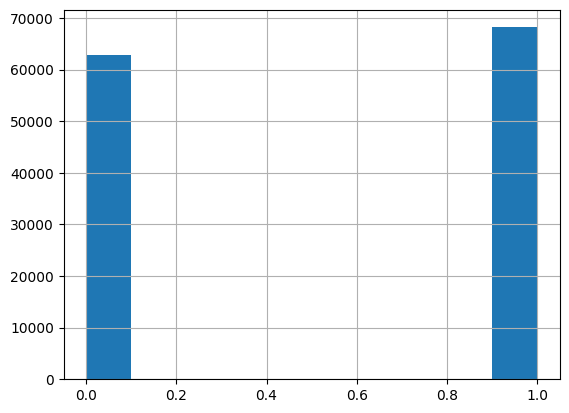

In [6]:
merged_data['prev_Returns'] = 100*((merged_data['close']-merged_data['close'].shift(1))/merged_data['close'])
merged_data['return'] = 100*merged_data['close'].pct_change()
merged_data['volatility'] = 10*merged_data['return'].rolling(30).std().shift(-30)

# merged_data['volatility'] = 100*((merged_data['close'].shift(-30)-merged_data['close'])/merged_data['close'])

threshold = 0.47
merged_data['return_class'] = 0
# merged_data.loc[abs(merged_data['volatility'])>threshold, 'return_class'] = 1
merged_data.loc[(merged_data['volatility'])>threshold, 'return_class'] = 1

# df.loc[df['return']<-threshold, 'return_class'] = 2

print((merged_data['return_class']==0).sum()/len(merged_data))
print((merged_data['return_class']==1).sum()/len(merged_data))
# print((df['return_class']==2).sum()/len(df))

merged_data['return_class'].hist()

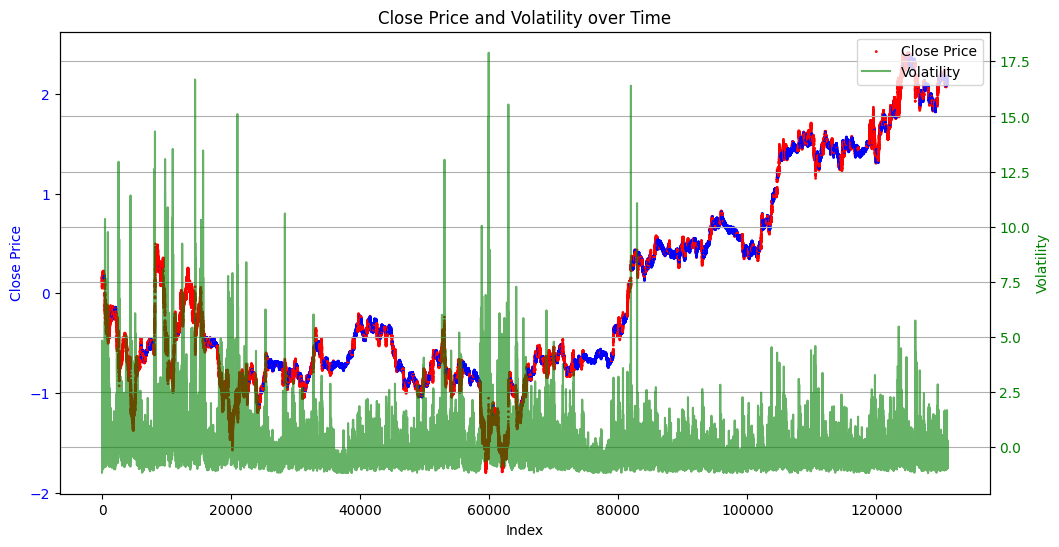

In [13]:
# prompt: plot close column of data_stocks and show return_class with value 1 as red point, and value 0 with blue point with low size. also plot Volatility in same figure but with different axis scale

import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot 'close' with different colors and sizes based on 'return_class'
scatter = ax1.scatter(
    data_stock.index,
    data_stock['close'],
    c=data_stock['return_class'],
    cmap='bwr', # Blue-White-Red colormap
    s=1*data_stock['return_class'].apply(lambda x: 1 if x == 1 else 1), # Adjust size based on return_class
    label='Close Price'
)
ax1.set_xlabel('Index')
ax1.set_ylabel('Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Close Price and Volatility over Time')


# Create a secondary axis for 'Volatility'
ax2 = ax1.twinx()
ax2.plot(data_stock.index, data_stock['Volatility'], label='Volatility', color='green', alpha=0.6)
ax2.set_ylabel('Volatility', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add legend for both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
fig.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)


plt.grid(True)
plt.show()


Normalizing data and define input features

In [7]:
selected_f = ['open', 'high', 'low', 'close', 'volume', 'quoteAssetVolume', 'numberOfTrades', 'takerBuyBaseVol',
       'takerBuyQuoteVol', 'Volatility',
       'SMA_5', 'EMA_5', 'SMA_10', 'EMA_10', 'SMA_20', 'EMA_20', 'EMA_50',
       'SMA_100', 'EMA_100', 'EMA_200', 'Std_20', 'Upper_BB', 'Lower_BB',
       'prev_Returns', 'EMA_12', 'EMA_26', 'MACD', 'Signal']

for x in selected_f:
  merged_data[x] = merged_data[x].fillna(0)
  merged_data[x] = merged_data[x].astype(float)
  merged_data[x] = (merged_data[x]-merged_data[x].mean())/(merged_data[x].std())

Choose some timestamps with no news

In [8]:
merged_data = merged_data.dropna().reset_index().drop('index',axis=1)
data_stock = merged_data.copy()

selected_time = data_stock[(data_stock['time']>='2025-02-25 00:00:00') & (data_stock['dateTime']<'2025-05-25 01:44:00') & (~data_stock['time'].isin(df_news['time']))]['time'].sample(3000, random_state=42).to_list()

Adding No News rows to the main dataframe

In [9]:
df_news2 = df_news.copy()
df_news2['releasedAt'] = df_news2['releasedAt'].astype(str)
based_len = df_news2.index[-1]
list_data = []
for i in range(len(selected_time)):
  dict_data = {}
  dict_data['id'] = based_len+1+i
  dict_data['title'] = 'There is no news'
  dict_data['content'] = 'There is no news'
  dict_data['time'] = selected_time[i]
  dict_data['releasedAt'] = selected_time[i]
  list_data.append(dict_data)
df_news2 = pd.concat([df_news2, pd.DataFrame(list_data)])
df_news2 = df_news2.sort_values('time').reset_index().drop('index', axis=1)
df_news2


,ID,releasedAt,title,subtitle,sourceName,sourceUrl,source,slug,asset_names,asset_slugs,asset_symbols,content,time,id
0,67bf0e677abefca47e66327e,2025-02-25 00:00:00,2025’s Crypto Battle: Altcoin vs. XRP and Bitc...,Digital currencies now play a key role in glob...,Crypto Front News,https://coinmarketcap.com/community/en/article...,coinmarketcap,blockdag-vs-bitcoin-xrp-which-crypto-holds-lon...,"Ethereum, Bitcoin, BlockDAG, XRP, One","ethereum, bitcoin, blockdag, xrp, gmix","ETH, BTC, BDAG, XRP, GMIX",Digital currencies now play a key role in glob...,2025-02-25 00:00:00,NaN
1,67bf0e677abefca47e663282,2025-02-25 00:00:00,Bitcoin Dives Below $90K Amid ETF Sell-Offs an...,"Bitcoin has dropped below $90,000 for the firs...",WalletInvestor,https://coinmarketcap.com/community/en/article...,coinmarketcap,bitcoin-dives-below-90k-amid-etf-sell-offs-and...,"Solana, ETF, Bitcoin, ETF, Shiba Inu","solana, etf, bitcoin, etfsol2024, shiba-inu","SOL, ETF, BTC, ETF, SHIB","Bitcoin has dropped below $90,000 for the firs...",2025-02-25 00:00:00,NaN
2,67bf0e677abefca47e663284,2025-02-25 00:00:00,4 Ways to Increase the Value of Crypto Assets,Cryptocurrency investments can be highly rewar...,WalletInvestor,https://coinmarketcap.com/community/en/article...,coinmarketcap,4-ways-to-increase-the-value-of-crypto-assets,"Bounty, Cryptocurrency, Million, Liquid, Rewards","bounty, cryptocurrency, million, liquid-networ...","BNTY, CCY, MM, LBTC, RWD",Cryptocurrency investments can be highly rewar...,2025-02-25 00:00:00,NaN
3,67bf0e677abefca47e66327c,2025-02-25 00:00:10,"Major Crypto News: XRP, SOLANA, and MAGACOINOF...",The Crypto Market’s Next Big Movers—Who’s Lead...,Bitcoin Sistemi,https://coinmarketcap.com/community/en/article...,coinmarketcap,major-crypto-news-xrp-solana-and-magacoinoffic...,"Ethereum, Win, Major, Solana, XRP","ethereum, connect-united, major, solana, xrp","ETH, WIN, MAJOR, SOL, XRP",The Crypto Market’s Next Big Movers—Who’s Lead...,2025-02-25 00:00:00,NaN
4,67bf0e677abefca47e663278,2025-02-25 00:01:00,"XRP on Verge of Losing Crucial Support, Ethere...",Numerous assets are reaching levels that might...,U.Today,https://coinmarketcap.com/community/en/article...,coinmarketcap,xrp-on-verge-of-losing-crucial-support-ethereu...,"Ethereum, Dogecoin, bullish, Dogecoin, XRP","ethereum, doge-on-base, bullish, dogecoin, xrp","ETH, DOGE, BULLISH, DOGE, XRP",Cover image viaU.TodayWith its price hovering ...,2025-02-25 00:01:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38974,6833ac73040d6fffd0a49f14,2025-05-25 23:40:38,Metaplanet Tops SBI Securities NISA Stock Purc...,Metaplanet leads as top stock purchase in Japa...,CoinLineup,https://coinmarketcap.com/community/en/article...,coinmarketcap,metaplanet-sbi-securities-nisa-stock,"Bitcoin, Top, Read, CEO","bitcoin, top-protocol, read, ceo","BTC, TOP, READ, CEO","Key Points:Metaplanet leads NISA purchases, si...",2025-05-25 23:40:00,NaN
38975,6833addc51e12bb49bc9cc37,2025-05-25 23:47:19,Bitcoin Halving Post-2024 Sparks Consolidation...,The 2024 Bitcoin halving event triggers signif...,TokenTopNews,https://coinmarketcap.com/community/en/article...,coinmarketcap,bitcoin-halving-2024-market-analysis,"2024, 2024, Bitcoin, Read","2024-token, 2024-bsc, bitcoin, read","2024, 2024, BTC, READ",Key Takeaways:Bitcoin post-halving consolidati...,2025-05-25 23:47:00,NaN
38976,6833af44d4ba08aec29a16cf,2025-05-25 23:52:53,Spot Bitcoin ETFs Achieve $25 Billion Weekly V...,U.S. spot Bitcoin ETFs reach $25 billion in we...,Bitcoin Info News,https://coinmarketcap.com/community/en/article...,coinmarketcap,bitcoin-etfs-25-billion-volume,"Bitcoin ETF, Bitcoin, Read, Spot, BlackRock","bitcoin-etf-token, bitcoin, read, spot, blackrock","ETF, BTC, READ, SPOT, BLACKROCK",What to Know:Record trading volume in U.S. Bit...,2025-05-25 23:52:00,NaN
38977,6833af44d4ba08aec29a16cd,2025-05-25 23:55:31,"Trump Postpones EU Tariffs, Bitcoin Breaks $10...",Trump delays EU tariffs to July; Bitcoin rises...,Coincu,https:/

Adding OHLCVs index to the News dataframe for synchronization

In [10]:
# data_stock = data_btc_total.copy()
data_stock['my_id'] = data_stock.index
df_news2 = df_news2.merge(data_stock[['my_id', 'time', 'return_class']], on='time', how='left')
df_news2

,ID,releasedAt,title,subtitle,sourceName,sourceUrl,source,slug,asset_names,asset_slugs,asset_symbols,content,time,id,my_id,return_class
0,67bf0e677abefca47e66327e,2025-02-25 00:00:00,2025’s Crypto Battle: Altcoin vs. XRP and Bitc...,Digital currencies now play a key role in glob...,Crypto Front News,https://coinmarketcap.com/community/en/article...,coinmarketcap,blockdag-vs-bitcoin-xrp-which-crypto-holds-lon...,"Ethereum, Bitcoin, BlockDAG, XRP, One","ethereum, bitcoin, blockdag, xrp, gmix","ETH, BTC, BDAG, XRP, GMIX",Digital currencies now play a key role in glob...,2025-02-25 00:00:00,NaN,NaN,NaN
1,67bf0e677abefca47e663282,2025-02-25 00:00:00,Bitcoin Dives Below $90K Amid ETF Sell-Offs an...,"Bitcoin has dropped below $90,000 for the firs...",WalletInvestor,https://coinmarketcap.com/community/en/article...,coinmarketcap,bitcoin-dives-below-90k-amid-etf-sell-offs-and...,"Solana, ETF, Bitcoin, ETF, Shiba Inu","solana, etf, bitcoin, etfsol2024, shiba-inu","SOL, ETF, BTC, ETF, SHIB","Bitcoin has dropped below $90,000 for the firs...",2025-02-25 00:00:00,NaN,NaN,NaN
2,67bf0e677abefca47e663284,2025-02-25 00:00:00,4 Ways to Increase the Value of Crypto Assets,Cryptocurrency investments can be highly rewar...,WalletInvestor,https://coinmarketcap.com/community/en/article...,coinmarketcap,4-ways-to-increase-the-value-of-crypto-assets,"Bounty, Cryptocurrency, Million, Liquid, Rewards","bounty, cryptocurrency, million, liquid-networ...","BNTY, CCY, MM, LBTC, RWD",Cryptocurrency investments can be highly rewar...,2025-02-25 00:00:00,NaN,NaN,NaN
3,67bf0e677abefca47e66327c,2025-02-25 00:00:10,"Major Crypto News: XRP, SOLANA, and MAGACOINOF...",The Crypto Market’s Next Big Movers—Who’s Lead...,Bitcoin Sistemi,https://coinmarketcap.com/community/en/article...,coinmarketcap,major-crypto-news-xrp-solana-and-magacoinoffic...,"Ethereum, Win, Major, Solana, XRP","ethereum, connect-united, major, solana, xrp","ETH, WIN, MAJOR, SOL, XRP",The Crypto Market’s Next Big Movers—Who’s Lead...,2025-02-25 00:00:00,NaN,NaN,NaN
4,67bf0e677abefca47e663278,2025-02-25 00:01:00,"XRP on Verge of Losing Crucial Support, Ethere...",Numerous assets are reaching levels that might...,U.Today,https://coinmarketcap.com/community/en/article...,coinmarketcap,xrp-on-verge-of-losing-crucial-support-ethereu...,"Ethereum, Dogecoin, bullish, Dogecoin, XRP","ethereum, doge-on-base, bullish, dogecoin, xrp","ETH, DOGE, BULLISH, DOGE, XRP",Cover image viaU.TodayWith its price hovering ...,2025-02-25 00:01:00,NaN,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38974,6833ac73040d6fffd0a49f14,2025-05-25 23:40:38,Metaplanet Tops SBI Securities NISA Stock Purc...,Metaplanet leads as top stock purchase in Japa...,CoinLineup,https://coinmarketcap.com/community/en/article...,coinmarketcap,metaplanet-sbi-securities-nisa-stock,"Bitcoin, Top, Read, CEO","bitcoin, top-protocol, read, ceo","BTC, TOP, READ, CEO","Key Points:Metaplanet leads NISA purchases, si...",2025-05-25 23:40:00,NaN,129579.0,1.0
38975,6833addc51e12bb49bc9cc37,2025-05-25 23:47:19,Bitcoin Halving Post-2024 Sparks Consolidation...,The 2024 Bitcoin halving event triggers signif...,TokenTopNews,https://coinmarketcap.com/community/en/article...,coinmarketcap,bitcoin-halving-2024-market-analysis,"2024, 2024, Bitcoin, Read","2024-token, 2024-bsc, bitcoin, read","2024, 2024, BTC, READ",Key Takeaways:Bitcoin post-halving consolidati...,2025-05-25 23:47:00,NaN,129586.0,0.0
38976,6833af44d4ba08aec29a16cf,2025-05-25 23:52:53,Spot Bitcoin ETFs Achieve $25 Billion Weekly V...,U.S. spot Bitcoin ETFs reach $25 billion in we...,Bitcoin Info News,https://coinmarketcap.com/community/en/article...,coinmarketcap,bitcoin-etfs-25-billion-volume,"Bitcoin ETF, Bitcoin, Read, Spot, BlackRock","bitcoin-etf-token, bitcoin, read, spot, blackrock","ETF, BTC, READ, SPOT, BLACKROCK",What to Know:Record trading volume in U.S. Bit...,2025-05-25 23:52:00,NaN,129591.0,0.0
38977,6833af44d4ba08aec29a16cd,2025-05-25 23:55:31,"Trump Pos

<Axes: >

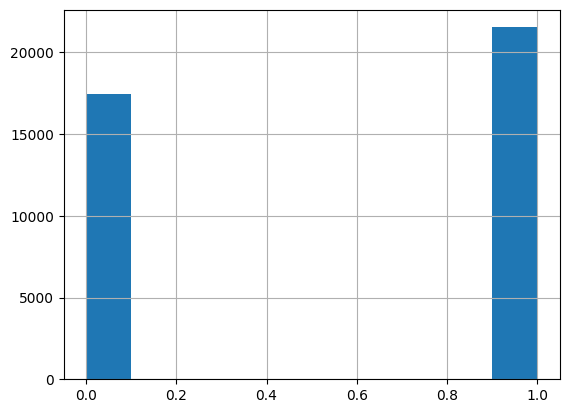

In [11]:
df_news2 = df_news2[~df_news2['my_id'].isna()].copy()
df_news2['return_class'].hist()

Create Dataclass and dataloader

In [20]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset


class NewsMarketFusionDataset(Dataset):
    def __init__(self, df_text, list_ohlcv, list_time, features=None, tokenizer='a', seq_len=30, max_text_len=512):
        if features is None:
            features = ['open', 'high', 'low', 'close', 'volume', 'return']
        self.seq_len = seq_len
        self.features = features
        self.df_text = df_text
        self.list_ohlcv = list_ohlcv
        self.list_time = list_time
        self.tokenizer = tokenizer
        self.max_text_len = max_text_len

    def __len__(self):
        return len(self.df_text)


    def __getitem__(self, idx):
        row = self.df_text.iloc[idx]

        # 1. Get OHLCV time series window ending at my_id
        ohlcv_seq = self.list_ohlcv[idx]
        ohlcv_seq = torch.tensor(ohlcv_seq, dtype=torch.float32)  # shape [seq_len, num_features]

        x_mask = self.list_time[idx]
        x_mask = torch.tensor(x_mask, dtype=torch.float32)


        text = row['text'] if pd.notna(row['text']) else ""
        encoding = self.tokenizer(text, padding='max_length', truncation=True,
                                  max_length=self.max_text_len, return_tensors='pt')
        input_ids = encoding['input_ids'].squeeze(0)
        attention_mask = encoding['attention_mask'].squeeze(0)

        # 3. Get label
        label = torch.tensor(row['label'], dtype=torch.long)  # change dtype for classification

        return ohlcv_seq, input_ids, attention_mask, label



Create Timestamp index for TimesNet

In [21]:
import warnings
warnings.filterwarnings('ignore')
from torch.utils.data import Dataset, DataLoader

df_stamp = data_stock[['dateTime']]
df_stamp['month'] = df_stamp.dateTime.apply(lambda row: row.month, 1)
df_stamp['day'] = df_stamp.dateTime.apply(lambda row: row.day, 1)
df_stamp['weekday'] = df_stamp.dateTime.apply(lambda row: row.weekday(), 1)
df_stamp['hour'] = df_stamp.dateTime.apply(lambda row: row.hour, 1)
df_stamp['minute'] = df_stamp.dateTime.apply(lambda row: row.minute, 1)
data_stamp = df_stamp.drop(['dateTime'], axis=1).values

Creating Dataloader based on news samples

In [22]:
df_news2 = df_news2[df_news2['my_id']>100].copy()
df_news2['my_id'] = df_news2['my_id'].astype(int)

In [38]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, get_scheduler
model_name = "yiyanghkust/finbert-tone"
tokenizer = AutoTokenizer.from_pretrained(model_name)

seq_len = 30

list_ohlcv = []
list_time  = []
for i in range(len(df_news2)):
  my_id = df_news2.iloc[i]['my_id']
  dict_ohlcv = {}
  dict_ohlcv[my_id] = data_stock.iloc[my_id-seq_len+1:my_id+1]
  list_ohlcv.append(data_stock.iloc[my_id-seq_len+1:my_id+1][selected_f].values)
  list_time.append(data_stamp[my_id-seq_len+1:my_id+1])

input_text = 'content'
target_text = 'return_class'
df_text_input = df_news2[[input_text, target_text]].rename(columns={input_text:'text', target_text:'label'}).copy()

df_text_input = df_text_input.iloc[:20000]
list_ohlcv    = list_ohlcv[:20000]
list_time     = list_time[:20000]

split = int(0.8 * len(df_text_input))


train_dataset = NewsMarketFusionDataset(df_text = df_text_input.iloc[:split], list_ohlcv = list_ohlcv[:split],
                                   list_time=list_time[:split], features=selected_f, tokenizer=tokenizer, seq_len=seq_len, max_text_len=512)

val_dataset = NewsMarketFusionDataset(df_text = df_text_input.iloc[split:], list_ohlcv = list_ohlcv[split:],
                                   list_time=list_time[split:], features=selected_f, tokenizer=tokenizer, seq_len=seq_len, max_text_len=512)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

Loading and Using Finbert as the LLM

In [39]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, get_scheduler
model_name = "yiyanghkust/finbert-tone"
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [40]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Transformer Network

In [41]:
import math
import torch.nn as nn
import torch

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=500):
        super().__init__()
        pe = torch.zeros(max_len, d_model)  # [max_len, d_model]
        position = torch.arange(0, max_len, dtype=torch.float32).unsqueeze(1)  # [max_len, 1]
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))  # [d_model/2]

        pe[:, 0::2] = torch.sin(position * div_term)  # even dims
        pe[:, 1::2] = torch.cos(position * div_term)  # odd dims
        pe = pe.unsqueeze(0)  # [1, max_len, d_model]
        self.register_buffer('pe', pe)

    def forward(self, x):
        # x: [batch_size, seq_len, d_model]
        x = x + self.pe[:, :x.size(1), :]
        return x

class TransformerReturnPredictor(nn.Module):
    def __init__(self, feature_dim, d_model=64, nhead=4, num_layers=2, max_len=500):
        super().__init__()
        self.input_proj = nn.Linear(feature_dim, d_model)
        self.pos_encoder = PositionalEncoding(d_model, max_len=max_len)

        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.output_layer = nn.Linear(d_model, 1)

    def forward(self, x):
        # x: [batch_size, seq_len, feature_dim]
        x = self.input_proj(x)             # [batch_size, seq_len, d_model]
        x = self.pos_encoder(x)            # Add positional encoding
        x = self.transformer(x)            # [batch_size, seq_len, d_model]
        x = x[:, -1, :]                    # Use representation of last time step
        return self.output_layer(x).squeeze(-1)




Set Model Configs

In [42]:
from transformers import AutoModel
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification, get_scheduler
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
from tqdm import tqdm

class MarketNewsFusionModel(nn.Module):
    def __init__(self, finbert_model_name, feature_dim, d_model=64, nhead=4, num_layers=2, max_len=30, num_classes=2):
        super().__init__()

        # OHLCV Transformer
        self.input_proj = nn.Linear(feature_dim, d_model)
        self.pos_encoder = PositionalEncoding(d_model, max_len=max_len)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        # FinBERT
        self.finbert = AutoModel.from_pretrained(finbert_model_name)
        self.finbert_proj = nn.Linear(self.finbert.config.hidden_size, d_model)

        # Classifier
        self.classifier = nn.Linear(d_model * 2, num_classes)

    def forward(self, ohlcv_seq, input_ids, attention_mask):
        # Transformer on OHLCV
        x = self.input_proj(ohlcv_seq)           # [B, T, d_model]
        x = self.pos_encoder(x)
        x = self.transformer(x)                  # [B, T, d_model]
        x_market = x[:, -1, :]                   # [B, d_model]

        # FinBERT [CLS] embedding
        with torch.set_grad_enabled(self.training):
            outputs = self.finbert(input_ids=input_ids, attention_mask=attention_mask)
            cls_embed = outputs.last_hidden_state[:, 0, :]  # [B, hidden]
        x_news = self.finbert_proj(cls_embed)               # [B, d_model]

        # Combine and classify
        fusion = torch.cat([x_market, x_news], dim=-1)      # [B, d_model*2]
        out = self.classifier(fusion)
        return out

In [43]:
import os
import torch
from torch import optim
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_labels = df_news2[target_text].nunique()

model_name = "yiyanghkust/finbert-tone"
# model_name = "google/bigbird-roberta-base"

model = MarketNewsFusionModel(model_name, feature_dim=len(selected_f), num_classes=2).to(device)

loss_fn = nn.CrossEntropyLoss()

In [44]:
import gc
import torch

# delete any large tensors or models you still have in scope
# force Python GC
gc.collect()

# clear PyTorch’s cached but unused memory
torch.cuda.empty_cache()


Test model input and output

In [45]:
for ohlcv_seq, input_ids, attention_mask, label in train_loader:
    ohlcv_seq = ohlcv_seq.to(device)
    input_ids = input_ids.to(device)
    attention_mask = attention_mask.to(device)
    label = label.to(device)

    out = model(ohlcv_seq, input_ids, attention_mask)
    loss = loss_fn(out, label)  # use BCEWithLogitsLoss or CrossEntropyLoss

    print(loss)
    break

tensor(0.7639, device='cuda:0', grad_fn=<NllLossBackward0>)


In [47]:
import numpy as np
import torch

# Assuming `df_news2['label']` holds your class labels
df_text_input['label'] = df_text_input['label'].astype(int)
class_counts = np.bincount(df_text_input['label'].values)
print("Class counts:", class_counts)


class_counts = np.bincount(df_text_input['label'].values)
print("Class counts:", class_counts)
weights = 1.0 / class_counts
weights = (np.sum(class_counts)/np.max(class_counts))*(weights / weights.sum())
class_weights = torch.tensor(weights, dtype=torch.float32).to(device)

loss_fn = nn.CrossEntropyLoss(weight=class_weights)


Class counts: [ 5777 14223]
Class counts: [ 5777 14223]


Loading Data

In [48]:
import torch
from torch import nn, optim
from torch.utils.data import random_split, DataLoader
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm
# from dataset import generate_fake_ohlcv_dataset, ReturnClassDataset
# from model import TimesNetClassifier  # assuming you save model in model.py
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

seq_len = 30

list_ohlcv = []
list_time  = []
for i in range(len(df_news2)):
  my_id = df_news2.iloc[i]['my_id']
  dict_ohlcv = {}
  dict_ohlcv[my_id] = data_stock.iloc[my_id-seq_len+1:my_id+1]
  list_ohlcv.append(data_stock.iloc[my_id-seq_len+1:my_id+1][selected_f].values)
  list_time.append(data_stamp[my_id-seq_len+1:my_id+1])

input_text = 'content'
target_text = 'return_class'
df_text_input = df_news2[[input_text, target_text]].rename(columns={input_text:'text', target_text:'label'}).copy()
df_text_input['label'] = df_text_input['label'].astype(int)

df_text_input = df_text_input.fillna('')#.iloc[:2000]
list_ohlcv    = list_ohlcv#[:2000]
list_time     = list_time#[:2000]

split = int(0.8 * len(df_text_input))


train_dataset = NewsMarketFusionDataset(df_text = df_text_input.iloc[:split], list_ohlcv = list_ohlcv[:split],
                                   list_time=list_time[:split], features=selected_f, tokenizer=tokenizer, seq_len=seq_len, max_text_len=512)

val_dataset = NewsMarketFusionDataset(df_text = df_text_input.iloc[split:], list_ohlcv = list_ohlcv[split:],
                                   list_time=list_time[split:], features=selected_f, tokenizer=tokenizer, seq_len=seq_len, max_text_len=512)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)



Training models

In [ ]:

# Model
model = MarketNewsFusionModel(model_name, feature_dim=len(selected_f), num_classes=2).to(device)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

class_counts = np.bincount(df_text_input['label'].values)
weights = 1.0 / class_counts
weights = (np.sum(class_counts)/np.max(class_counts))*(weights / weights.sum())
class_weights = torch.tensor(weights, dtype=torch.float32).to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights)

# Early stopping setup
best_val_acc = 0.0
epochs_no_improve = 0
patience = 5
best_model_state = None
early_stop = False

num_epochs = 50  # allow more epochs to benefit from early stopping

for epoch in range(num_epochs):
    model.train()
    train_losses = []
    all_preds, all_targets = [], []

    for ohlcv_seq, input_ids, attention_mask , label in tqdm(train_loader, desc=f"Epoch {epoch+1} Training"):
        ohlcv_seq = ohlcv_seq.to(device)
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        # x_mask = x_mask.to(device)
        label = label.to(device)
        optimizer.zero_grad()
        output = model(ohlcv_seq, input_ids, attention_mask)
        output = output.squeeze(1)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
        preds = output.argmax(dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_targets.extend(label.cpu().numpy())

    print("Classification Report:\n", classification_report(all_targets, all_preds, target_names=['Natural', 'Up']))

    # Validation
    model.eval()
    val_losses = []
    all_preds, all_targets = [], []
    with torch.no_grad():
        for ohlcv_seq, input_ids, attention_mask , label in tqdm(val_loader, desc=f"Epoch {epoch+1} Validation"):
            ohlcv_seq, label = ohlcv_seq.to(device), label.to(device)
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            optimizer.zero_grad()
            output = model(ohlcv_seq, input_ids, attention_mask)
            output = output.squeeze(1)
            loss = criterion(output, label)
            val_losses.append(loss.item())
            preds = output.argmax(dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_targets.extend(label.cpu().numpy())

    val_acc = accuracy_score(all_targets, all_preds)

    print(f"\nEpoch {epoch+1}: Train Loss = {sum(train_losses)/len(train_losses):.4f}, "
          f"Val Loss = {sum(val_losses)/len(val_losses):.4f}, "
          f"Val Acc = {val_acc:.4f}")
    print("Val Classification Report:\n", classification_report(all_targets, all_preds, target_names=['Natural', 'Up']))

    # Early stopping check
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_model_state = model.state_dict()
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1

    if epochs_no_improve >= patience:
        print(f"\nEarly stopping triggered after {epoch+1} epochs. Best Val Acc = {best_val_acc:.4f}")
        early_stop = True
        break

# Load best model weights
if best_model_state is not None:
    model.load_state_dict(best_model_state)



Epoch 1 Training: 100%|██████████| 975/975 [10:54<00:00,  1.49it/s]


Classification Report:
               precision    recall  f1-score   support

     Natural       0.76      0.86      0.81     13380
          Up       0.88      0.80      0.84     17789

    accuracy                           0.82     31169
   macro avg       0.82      0.83      0.82     31169
weighted avg       0.83      0.82      0.83     31169



Epoch 1 Validation: 100%|██████████| 244/244 [01:07<00:00,  3.62it/s]



Epoch 1: Train Loss = 0.3780, Val Loss = 0.4890, Val Acc = 0.7503
Val Classification Report:
               precision    recall  f1-score   support

     Natural       0.71      0.89      0.79      4057
          Up       0.83      0.60      0.70      3736

    accuracy                           0.75      7793
   macro avg       0.77      0.74      0.74      7793
weighted avg       0.77      0.75      0.74      7793



Epoch 2 Training:   2%|▏         | 15/975 [00:10<10:42,  1.50it/s]

In [ ]:
df_text_input['label'].astype(int)

,label
17,1.0
18,1.0
19,1.0
20,1.0
21,1.0
...,...
38974,1.0
38975,0.0
38976,0.0
38977,0.0
